In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from wordcloud import WordCloud
import plotly.express as px
import seaborn as sns
import re
# Cargar el archivo CSV
url = 'https://github.com/CarlosG29/Csv_Reviews/raw/refs/heads/main/Reviews.csv'
df = pd.read_csv(url)

# # Mostrar las primeras filas del DataFrame
print(df.head())

# # Mostrar los nombres de las columnas
# print("Columnas del Reviews CSV:", df.columns)

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

In [2]:
#Filtramos las columnas importantes
df = df[['Text', 'Score']]

# Revisamos la distribución de las calificaciones
fig = px.histogram(df, x='Score', nbins=5, title='Distribución de calificaciones')
fig.show()


In [43]:
# Creamos la columna de sentimiento (+1 para positivos, -1 para negativos)
df['sentiment'] = df['Score'].apply(lambda x: 1 if x > 3 else (-1 if x < 3 else 0))

# Eliminamos los valores neutrales (Score == 3)
df = df[df['sentiment'] != 0]


In [44]:
#DataFrames separados para las reseñas positivas y negativas
df_positive = df[df['sentiment'] == 1]
df_negative = df[df['sentiment'] == -1]



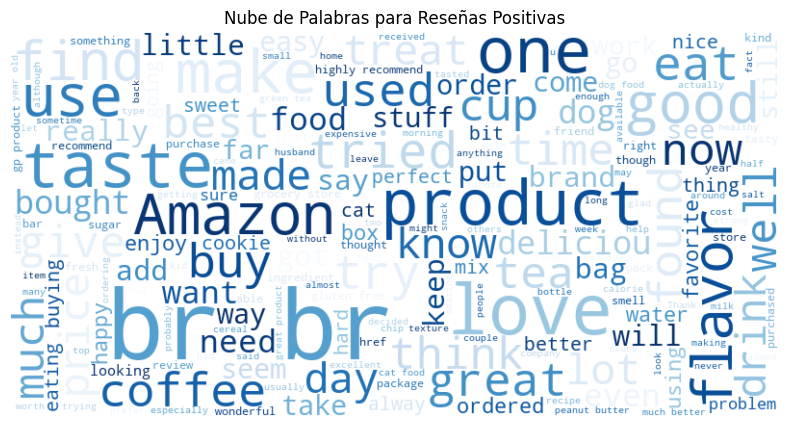

In [45]:
#Nube de Palabras para Reseñas Positivas

# Combinamos todas las reseñas positivas en una sola cadena de texto
positive_text = " ".join(review for review in df_positive['Text'])

# Generamos la nube de palabras para reseñas positivas
wordcloud_positive = WordCloud(width=800, height=400,  # tamaño
                               max_font_size=100,  #  fuente
                               background_color='white',  # Fondo blanco
                               colormap='Blues'  
                               ).generate(positive_text)

# Mostrar la nube de palabras para reseñas positivas
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de Palabras para Reseñas Positivas")
plt.show()

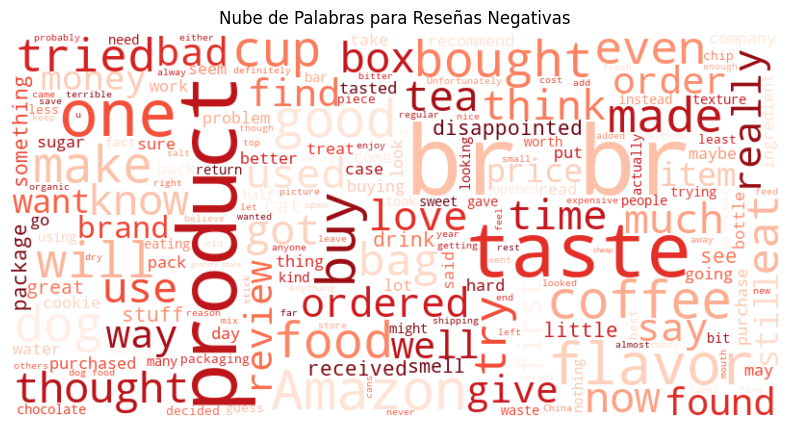

In [46]:
#Nube de Palabras para Reseñas Negativas

# Combinamos todas las reseñas negativas en una sola cadena otra vez
negative_text = " ".join(review for review in df_negative['Text'])

# Generamos la nube de palabras para reseñas negativas
wordcloud_negative = WordCloud(width=800, height=400,  # Ajuste de tamaño
                               max_font_size=100,  # Tamaño 
                               background_color='white',  # Fondo blanco
                               colormap='Reds'  
                               ).generate(negative_text)

# Mostrar la nube de palabras para reseñas negativas
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de Palabras para Reseñas Negativas")
plt.show()

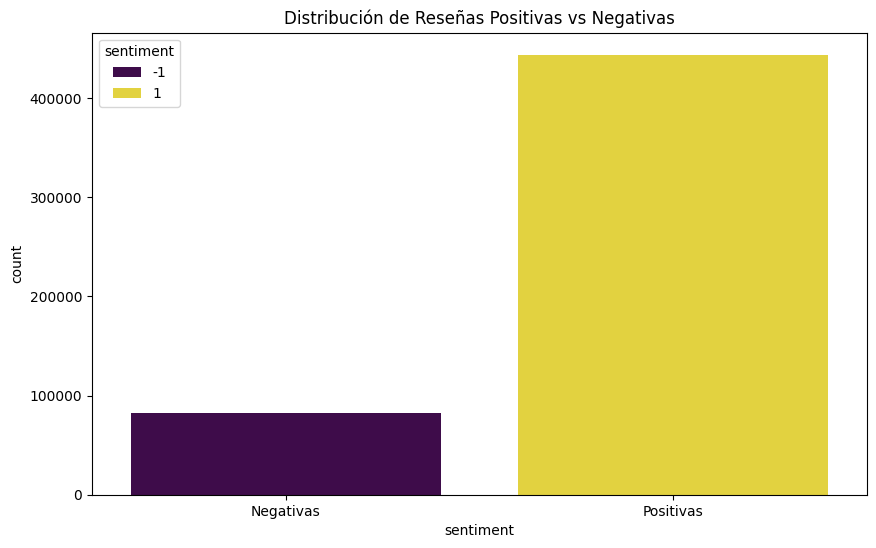

In [47]:
#  distribución de sentimientos (positivos vs negativos)
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=df, palette='viridis', hue='sentiment')
plt.title('Distribución de Reseñas Positivas vs Negativas')
plt.xticks([0, 1], ['Negativas', 'Positivas'])
plt.show()

In [48]:
# Limpieza de datos
# Removemos puntuación y caracteres especiales de las reseñas

df.loc[:, 'cleaned_text'] = df['Text'].apply(lambda x: re.sub(r'[^\w\s]', '', x.lower()))


# Dividimos los datos en entrenamiento y prueba
X = df['cleaned_text']
y = df['sentiment']

#  datos: 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  bolsa de palabras
# Convertimos el texto a una matriz de ocurrencias de palabras
vectorizer = CountVectorizer(stop_words='english')  # Eliminamos palabras comunes (stopwords)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

#  Entrenamiento del modelo de regresión logística
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_vectorized, y_train)

# Evaluamos del modelo
# Predicciones en el conjunto de prueba
y_pred = log_reg.predict(X_test_vectorized)

# Matriz de confusión y reporte de clasificación
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Mostramos los resultados
print("Matriz de confusión:\n", conf_matrix)
print("\nReporte de clasificación:\n", class_report)

Matriz de confusión:
 [[12333  4046]
 [ 1985 86799]]

Reporte de clasificación:
               precision    recall  f1-score   support

          -1       0.86      0.75      0.80     16379
           1       0.96      0.98      0.97     88784

    accuracy                           0.94    105163
   macro avg       0.91      0.87      0.88    105163
weighted avg       0.94      0.94      0.94    105163

